In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

In [18]:
def constructPdfData(data, bins, cumulate):
    ret = [];
    numBins = len(bins)
    binsRange = range(0,numBins)
    count = len(data) #total number of tumors with this gene
    #initalize the returned data with 0 counts in all bins
    for i in binsRange:
        ret.append(0)
    
    #go through the expressionData and bin it
    for v in data:
        for i in binsRange:
            if i == 0:
                if v < bins[i+1]: #anything lower then the second bin value is in the first bin
                    ret[i] += 1
            elif i == numBins - 1: #anything equal to or higher then the last bin value is in the last bin
                if v >= bins[i]: 
                    ret[i] += 1
            elif v >= bins[i] and v < bins[i+1]:
                ret[i] += 1
    
    #now normalize it
    for i in binsRange:
        ret[i] = ret[i]/count
        
    #then cumulate it if we want to
    if cumulate:
        for i in range(1,numBins):
            ret[i] = ret[i] + ret[i-1]
        
    return ret 

In [2]:
rawAlias = pd.read_csv('data/9606.protein.aliases.v10.5.txt', delimiter='\t')
specialGenesProducts = set(pd.read_csv('Diff_1_3_01.txt', header=None)[0])
geneProdDist = pd.read_csv('out/fullmap/sortedbydegree.txt', delimiter='\t', header=None)

#build a map of aliases to protein_ids
proteinIdToAlias = {}
aliasToProteinId = {}
for val in list(zip(rawAlias.string_protein_id, rawAlias.alias)):
    aliasToProteinId[val[1]] = val[0]
    if not val[0] in proteinIdToAlias: #the alias file has lots of duplicates!
        proteinIdToAlias[val[0]]=[val[1]]
    else:
        proteinIdToAlias[val[0]].append(val[1])
        
print(str(datetime.datetime.now()))

Here
2019-01-16 16:24:32.694357


In [34]:
specialGeneProdDist = []
specialGeneProdVals = []
for item in geneProdDist.values:
    aliasesForItem = proteinIdToAlias[item[1]]
    isSpecial = not specialGenesProducts.isdisjoint(aliasesForItem)
    if isSpecial:
        specialGeneProdVals.append(item[0])
        specialGeneProdDist.append(item)

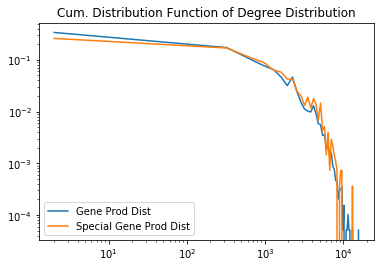

In [52]:
minVal = geneProdDist[0].min()
maxVal = geneProdDist[0].max()
bins = np.linspace(minVal, maxVal, 50)

plt.plot(bins, constructPdfData(geneProdDist[0], bins, False), label='Gene Prod Dist')
plt.plot(bins, constructPdfData(specialGeneProdVals, bins, False), label='Special Gene Prod Dist')
plt.title('Cum. Distribution Function of Degree Distribution')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [49]:
with open('out/fullmap/high_degree_significant_genes.txt', 'w') as f:
    for item in specialGeneProdDist[0:5]:
        f.write("%s\n" % item[1])
        
print('Done... Wrote out the 5 gene products with the highest degree to out/fullmap/high_degree_significant_genes.txt')
print(str(datetime.datetime.now()))

Done... Wrote out the 5 gene products with the highest degree to out/fullmap/high_degree_significant_genes.txt
2019-01-16 17:15:49.748532
